In [53]:
import os
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import operator



# Make folder to save output data in chosen directory
D_PATH='/Users/hh65/Desktop/220527_SP2si_2'
# Define CSV file name
data_file = 'EdURB_test01.csv'
# Set up data structure as dictionary assuming each row is a
# different coondition and columns are teechnical repeats
Row_Cond = {
    'Untreated':[1],
    'siCtr':[2],
    'siCCNA2':[3],
    'siSenp2':[4]
}

def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(D_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [54]:
csv_path=os.path.join(D_PATH, data_file)
df_gn=pd.read_csv(csv_path, index_col=0).sort_values(by=['row','column'])


In [55]:

for (k), (v) in Row_Cond.items():
    df_gn.loc[(df_gn['column'].isin(v)), 'column'] =k
df_gn


,label,area,max_intensity_DAPI,mean_intensity_DAPI,max_intensity_EdU,mean_intensity_EdU,column,row,integrated_int_DAPI
22872,1,151,6506.0,4224.900662,264.0,214.543046,Untreated,1,637960.0
22873,2,206,11916.0,7237.131068,323.0,255.446602,Untreated,1,1490849.0
22874,3,131,6364.0,4554.587786,275.0,217.511450,Untreated,1,596651.0
22875,4,152,6119.0,3808.921053,260.0,197.835526,Untreated,1,578956.0
22876,5,508,12589.0,7764.240157,3666.0,867.531496,Untreated,1,3944234.0
...,...,...,...,...,...,...,...,...,...
41597,913,125,8298.0,5846.000000,263.0,205.112000,siSenp2,6,730750.0
41598,914,182,6069.0,4191.329670,2651.0,1283.565934,siSenp2,6,762822.0
41599,915,167,6858.0,4834.263473,312.0,250.245509,siSenp2,6,807322.0
41600,916,124,11292.0,7213.000000,273.0,218.798387,siSenp2,6,894412.0


,label,area,max_intensity_DAPI,mean_intensity_DAPI,max_intensity_EdU,mean_intensity_EdU,column,row,integrated_int_DAPI,DNA_content
22872,1,151,6506.0,4224.900662,264.0,214.543046,Untreated,1,637960.0,0.887043
22873,2,206,11916.0,7237.131068,323.0,255.446602,Untreated,1,1490849.0,2.072930
22874,3,131,6364.0,4554.587786,275.0,217.511450,Untreated,1,596651.0,0.829605
22875,4,152,6119.0,3808.921053,260.0,197.835526,Untreated,1,578956.0,0.805001
22876,5,508,12589.0,7764.240157,3666.0,867.531496,Untreated,1,3944234.0,5.484205


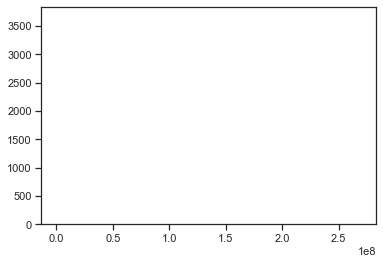

In [79]:
def dna_norm(df):
    """
    normalise histogram of DNA label
    :param df: input dataframe
    :return: input dataframe with additional column: "DNA_content"
    """
    y, x, _ = plt.hist(df['integrated_int_DAPI'].loc[df.column=='Untreated'], bins=10000)
    max=x[np.where(y == y.max())]
    df['DNA_content']=df['integrated_int_DAPI']/max[0]
    return df
df_gn=dna_norm(df_gn)
df_gn.head()


In [82]:
def EdUFigures(df, title):
    sns.set(style='ticks', font='Arial')
    cm = plt.cm.get_cmap('RdYlBu_r')
    fig, ax = plt.subplots(len(list(Row_Cond.keys())),2, figsize=(20, 5*len(list(Row_Cond.keys()))))
    for number,col in enumerate(list(Row_Cond.keys())):
        df1=df[(df['column']==col)]
        df1r=df1.sample(n = 3000,random_state=42)
        sns.histplot(data=df1,x='DNA_content', ax=ax[number,0])
        ax[number,0].set_xlim([0,4])
        ax[number,0].title.set_text(f'{col} DNA Histogram')
        df1r.plot.scatter( x='DNA_content', y='mean_intensity_EdU', ax=ax[number,1])
        ax[number,1].set_xlim([0,4])
        ax[number,1].set_yscale('log')
        ax[number,1].title.set_text(f'{col}  EdU Scatterplot')
    save_fig(title)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Saving figure Senp2_siRNA2_Scatterplot


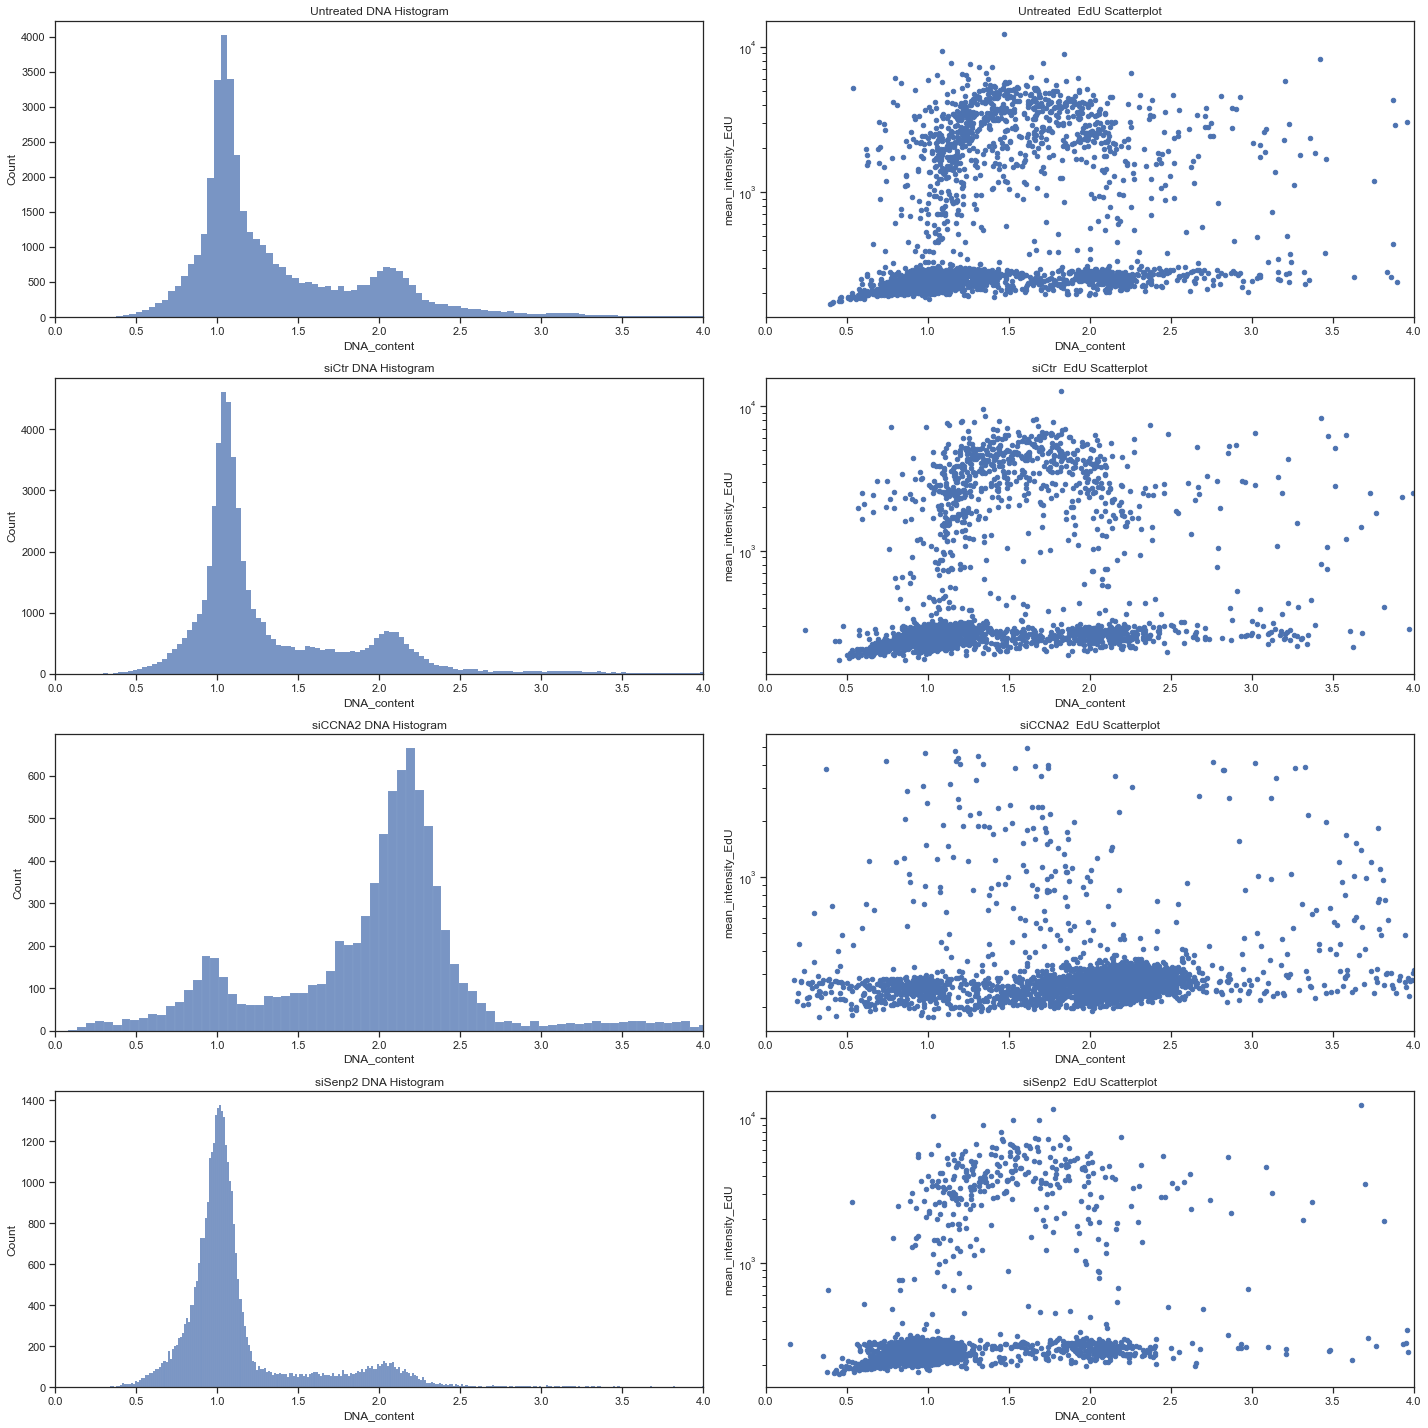

In [83]:
EdUFigures(df_gn,'Senp2_siRNA2_Scatterplot')

In [29]:
def EdUQuant(df_gn):
    col_numbers=[*range(len(list(Row_Cond.keys())))]
    col_numbers=[x+1 for x in col_numbers]
    df_number=pd.DataFrame({'Column': col_numbers,
                            'Condition':list(Row_Cond.keys())})
    df_number=df_number.set_index('Condition').join(df_gn.groupby(['column'])['area'].count()).rename(columns = {'area':'cell number'})
    df_G1=df_gn[(df_gn['DNA_content']<=1.5) & (df_gn['mean_intensity_EdU']<=1000)]
    df_G2=df_gn[(df_gn['DNA_content']>1.5) & (df_gn['mean_intensity_EdU']<=1000)]
    df_S=df_gn[df_gn['mean_intensity_EdU']>1000]
    df_number=df_number.join(df_G1.groupby(['column'])['area'].count()).rename(columns = {'area':'G1'})
    df_number=df_number.join(df_S.groupby(['column'])['area'].count()).rename(columns = {'area':'S'})
    df_number=df_number.join(df_G2.groupby(['column'])['area'].count()).rename(columns = {'area':'G2'})
    df_number['G1']=round(df_number['G1']/df_number['cell number']*100)
    df_number['S']=round(df_number['S']/df_number['cell number']*100)
    df_number['G2']=round(df_number['G2']/df_number['cell number']*100)
    return df_number




In [40]:
df_number=pd.DataFrame()
for i in range(df_gn.row.max()):
    df_number1=EdUQuant(df_gn[df_gn.row==i])
    df_number=pd.concat([df_number,df_number1])

In [43]:
Conditions_ordered=list(Row_Cond.keys())
dfmean=df_number.pivot_table(index='Condition', aggfunc='mean').reindex(Conditions_ordered)

dfstd=df_number.pivot_table(index='Condition', aggfunc='std').reindex(Conditions_ordered)
dfmean

,Column,G1,G2,S,cell number
Condition,,,,,
Untreated,1,48.4,24.6,27.0,7171.2
siCtr,2,57.8,20.6,22.0,9562.6
siCCNA2,3,14.6,81.8,3.6,1360.2
siSenp2,4,77.2,12.8,9.6,5794.6


Saving figure CCquant_mean


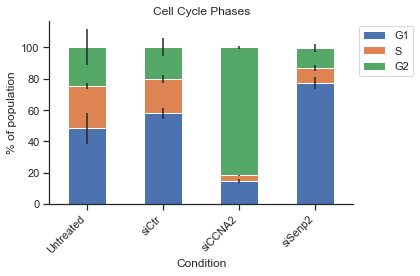

In [47]:
sns.set(style='ticks')
ax=dfmean[['G1','S','G2']].plot(kind='bar', yerr=dfstd[['G1','S','G2']], stacked=True)
sns.despine()
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.title.set_text('Cell Cycle Phases')
ax.set_ylabel('% of population')
ax.set_xticklabels(Conditions_ordered, rotation=45,horizontalalignment="right")
# df_number['cell number'].plot(kind='bar', ax=ax[1])
# ax[1].title.set_text('Cell Number')
# ax[1].set_ylabel('number of cells')
# ax[1].set_xticklabels(Conditions,rotation=45,horizontalalignment="right")
# df_number['H2AX'].plot(kind='bar',ax=ax[2])
# ax[2].title.set_text('% H2AX positive cells')
# ax[2].set_ylabel('H2AX positive cells')
# ax[2].set_xticklabels(Conditions,rotation=45,horizontalalignment="right")
save_fig('CCquant_mean')

Saving figure CellNumberquant_mean


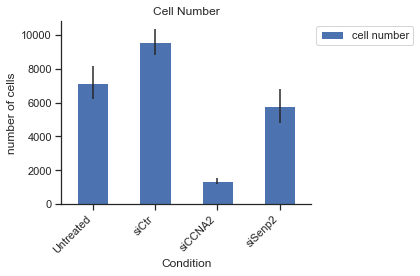

In [48]:
sns.set(style='ticks')
ax=dfmean[['cell number']].plot(kind='bar', yerr=dfstd[['cell number']])
sns.despine()
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.title.set_text('Cell Number')
ax.set_ylabel('number of cells')
ax.set_xticklabels(Conditions_ordered, rotation=45,horizontalalignment="right")
# df_number['cell number'].plot(kind='bar', ax=ax[1])
# ax[1].title.set_text('Cell Number')
# ax[1].set_ylabel('number of cells')
# ax[1].set_xticklabels(Conditions,rotation=45,horizontalalignment="right")
# df_number['H2AX'].plot(kind='bar',ax=ax[2])
# ax[2].title.set_text('% H2AX positive cells')
# ax[2].set_ylabel('H2AX positive cells')
# ax[2].set_xticklabels(Conditions,rotation=45,horizontalalignment="right")
save_fig('CellNumberquant_mean')